In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import integrate

https://stackoverflow.com/questions/77645217/solving-a-second-order-ode-that-has-a-summation-term

In [34]:
def model(t, x, a, b, c, As, Bs, omegas):
    rhs = np.sum([
        A * np.cos(omega * t) + B * np.sin(omega * t)
        for A, B, omega in zip(As, Bs, omegas)
    ])
    return np.array([
        x[1],
        (rhs - b * x[1] - c * x[0]) / a 
    ])

In [45]:
a = 2
b = -3
c = 2
As = [2, 8, 14] 
Bs = [3, 11, -2]
omegas = [20, 40, 60]
t = np.linspace(0, 100, 1000) 

In [46]:
solution = integrate.solve_ivp(
    model, [t.min(), t.max()], [0, 0],
    t_eval=t, args=(a, b, c, As, Bs, omegas)
)

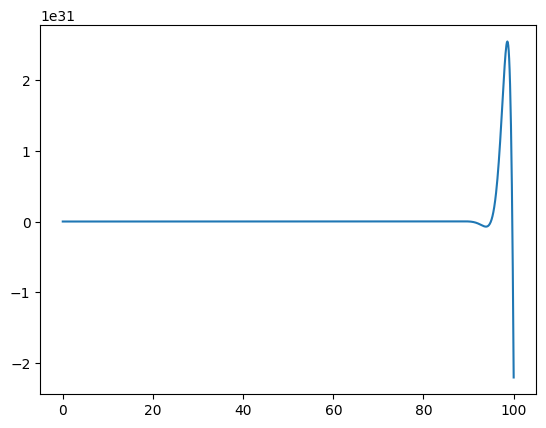

In [55]:
fig, axe = plt.subplots()
axe.plot(t, solution.y.T[:,0])